In [51]:
import os
import pandas as pd

# Base directory
base_dir = "HD1_ID"

# Initialize an empty list to hold all DataFrames
dataframes = []

# Traverse the directory structure
for root, dirs, files in os.walk(base_dir):
    for file in files:
        if file == "HD1_ID_S-0-0084.csv":  # Only process the specific CSV file
            # Full path to the file
            file_path = os.path.join(root, file)
            
            # Extract the target (the immediate subfolder of HD1_ID)
            target = root.split(os.sep)[1]  # Example: 'Empty', 'Half', 'Loaded'
            
            # Read the CSV file
            df = pd.read_csv(file_path, sep=" ", header=None)
            
            # Add the target column
            df["target"] = target
            
            # Append the DataFrame to the list
            dataframes.append(df)

# Combine all DataFrames into a single DataFrame
final_df = pd.concat(dataframes, ignore_index=True)
df = final_df

In [45]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,8183,8184,8185,8186,8187,8188,8189,8190,8191,target
0,-10.8,-11.0,-10.7,-10.8,-10.7,-11.1,-11.2,-11.0,-10.7,-10.9,...,-15.0,-15.4,-15.1,-14.9,-14.8,-15.1,-15.1,-15.0,-15.2,Empty
1,-9.9,-9.8,-9.6,-9.6,-9.5,-9.8,-9.8,-9.7,-9.9,-9.8,...,-14.5,-14.4,-14.1,-14.2,-14.1,-14.0,-14.3,-14.5,-14.5,Empty
2,-9.8,-10.0,-10.1,-10.6,-10.2,-10.1,-9.6,-9.8,-9.8,-9.9,...,-14.9,-14.5,-14.8,-14.6,-14.8,-15.1,-14.8,-14.8,-14.7,Empty
3,-9.5,-9.8,-9.8,-9.8,-9.9,-9.9,-9.7,-9.5,-9.8,-9.7,...,-15.1,-15.1,-15.0,-15.2,-15.2,-14.9,-14.9,-14.7,-14.8,Empty
4,-10.1,-10.1,-10.0,-10.2,-9.9,-9.9,-9.7,-10.0,-10.0,-9.7,...,-16.1,-16.0,-16.1,-15.8,-15.6,-15.8,-15.6,-15.9,-15.8,Empty


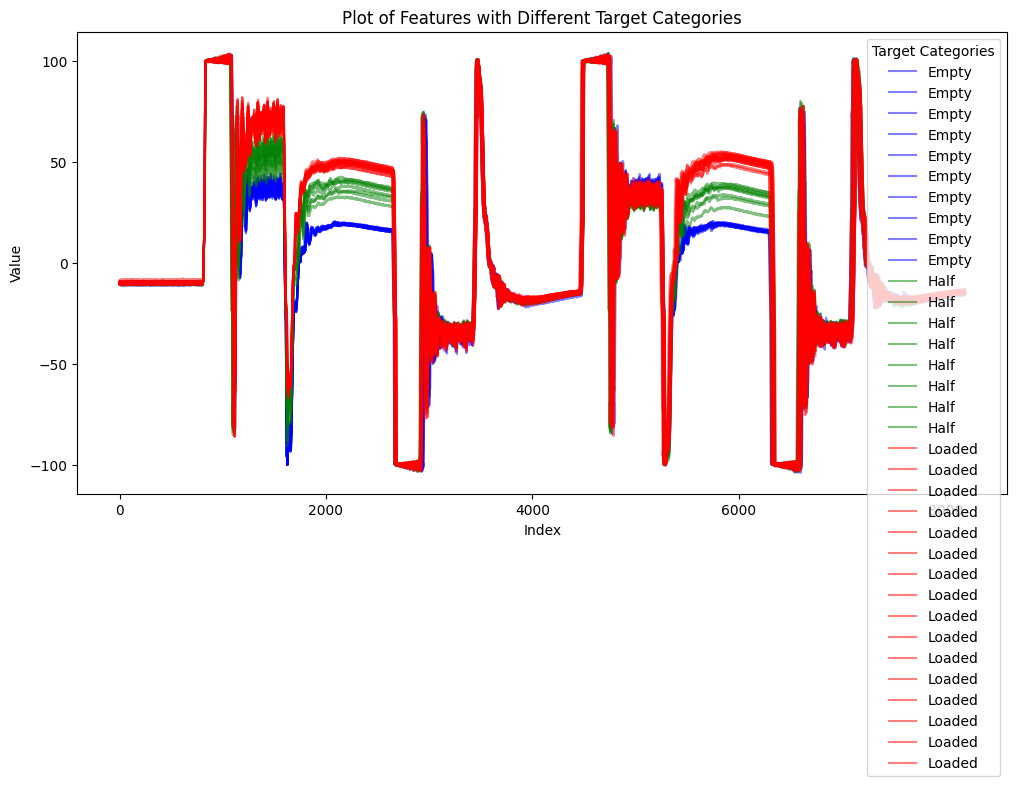

In [52]:
# Define a color map for the targets
color_map = {
    'Empty': 'blue',
    'Half': 'green',
    'Loaded': 'red'
}

# Create the plot
plt.figure(figsize=(12, 6))

# Plot each target category with a different color
for target, color in color_map.items():
    subset = final_df[final_df['target'] == target]
    
    # Loop over each row and plot the values
    for index, row in subset.iterrows():
        x = range(len(row) - 1)  # Exclude the 'target' column for X-axis (using column indices)
        y = row[:-1]  # Exclude the 'target' column for Y-axis (using the actual values)
        plt.plot(x, y, label=target, color=color, alpha=0.5)  # Plot each line with alpha for transparency

# Add labels and a title
plt.xlabel('Index')  # X-axis label (Index of each vertical line)
plt.ylabel('Value')  # Y-axis label (Value of each feature)
plt.title('Plot of Features with Different Target Categories')

# Add a legend
plt.legend(title="Target Categories")

# Show the plot
plt.show()

## Split and scale the data for model training

In [98]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming 'df' is your DataFrame and 'target' is the column name for the labels
X = df.drop(columns=["target"])  # Features (all columns except 'target')
y = df["target"]  # Target (the 'target' column)

# Split the dataset into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features (scaling is typically done only on the features, not the target)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Print sizes for verification
print(f'Training set size: {X_train.shape[0]} samples')
print(f'Test set size: {X_test.shape[0]} samples')


Training set size: 23 samples
Test set size: 11 samples


In [94]:
# Importing necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn import metrics 
from sklearn.metrics import accuracy_score

## Train with k nearest neigbors

In [99]:
# Create the KNN classifier
k = 3  # Number of neighbors 3,5,6,7,8,9,10,11,12 ... 24
knn = KNeighborsClassifier(n_neighbors=k)

# Train the classifier
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)


Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

       Empty       1.00      1.00      1.00         3
        Half       1.00      1.00      1.00         2
      Loaded       1.00      1.00      1.00         6

    accuracy                           1.00        11
   macro avg       1.00      1.00      1.00        11
weighted avg       1.00      1.00      1.00        11

[[3 0 0]
 [0 2 0]
 [0 0 6]]


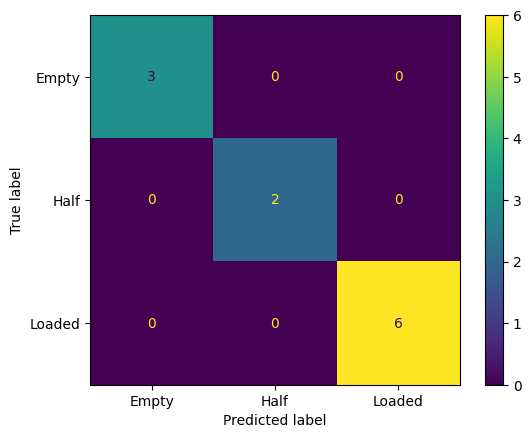

In [100]:
# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate the classification report
report = classification_report(y_test, y_pred, target_names=['Empty', 'Half', 'Loaded'])
print("Classification Report:\n", report)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)
# Plot the confusion matrix

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = ['Empty','Half','Loaded'])

cm_display.plot()
plt.show()

# SVM

In [87]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import pandas as pd
from sklearn import metrics 

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

       Empty       1.00      1.00      1.00         3
        Half       1.00      1.00      1.00         2
      Loaded       1.00      1.00      1.00         6

    accuracy                           1.00        11
   macro avg       1.00      1.00      1.00        11
weighted avg       1.00      1.00      1.00        11

[[3 0 0]
 [0 2 0]
 [0 0 6]]


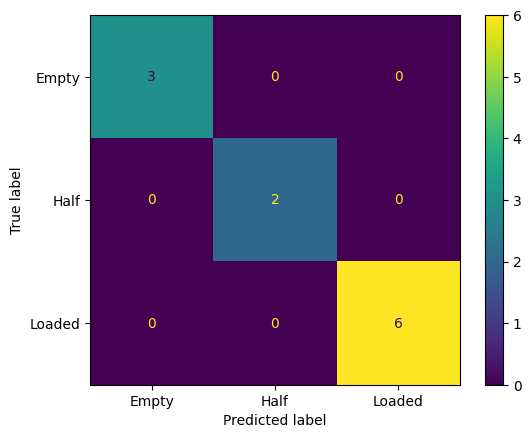

In [101]:
# Create the SVM classifier
svm = SVC(kernel='linear', C=1, random_state=42)

# Train the classifier
svm.fit(X_train, y_train)

# Make predictions
y_pred = svm.predict(X_test)


# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate the classification report
report = classification_report(y_test, y_pred, target_names=['Empty', 'Half', 'Loaded'])
print("Classification Report:\n", report)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)


print (conf_matrix)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = ['Empty', 'Half', 'Loaded'])

cm_display.plot()
plt.show()